In [9]:
## Input the modules needed for this project.

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

In [ ]:
## Find the path to the dataset and group them into img_list.
## For the path, need to add 'r' before the normal string. It converts normal string to raw string.

base_path = r'C:\Users\danni\OneDrive\Mini Project\Garbage Classification Dataset\Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

In [ ]:
## Return the total number of images in the dataset.

print(len(img_list))
print(type(img_list))

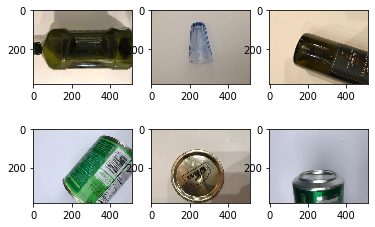

In [21]:
## Randomly choose six images from the dataset to display.

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [22]:
## Generate the three batches (training, testing, validation) before model building.

train_datagen = ImageDataGenerator(
    rescale=1./225, shear_range=0.1, zoom_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, validation_split=0.1)

test_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.1)
    
train_generator = train_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='training', seed=0)

validation_generator = test_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='validation', seed=0)

## Add indexes for the six groups.

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2278 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [24]:
## Build the CNN classification model.
## Why using 'relu' as the activation function?? How to optimize the parameters for the model??

model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

## Why having 100 epochs?? What are epoch, batch, and iteration for?

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(train_generator, epochs=100, steps_per_epoch=2276//32,validation_data=validation_generator,
                    validation_steps=251//32)

Epoch 1/100
71/71 [==============================] - 79s 1s/step - loss: 1.7473 - acc: 0.1979 - val_loss: 1.5011 - val_acc: 0.3661
Epoch 2/100
71/71 [==============================] - 90s 1s/step - loss: 1.4356 - acc: 0.4000 - val_loss: 1.4019 - val_acc: 0.4375
Epoch 3/100
71/71 [==============================] - 90s 1s/step - loss: 1.4166 - acc: 0.4213 - val_loss: 1.3337 - val_acc: 0.4732
Epoch 4/100
71/71 [==============================] - 89s 1s/step - loss: 1.3687 - acc: 0.4708 - val_loss: 1.4239 - val_acc: 0.4375
Epoch 5/100
71/71 [==============================] - 88s 1s/step - loss: 1.3615 - acc: 0.4691 - val_loss: 1.3336 - val_acc: 0.4554
Epoch 6/100
71/71 [==============================] - 95s 1s/step - loss: 1.2649 - acc: 0.5065 - val_loss: 1.3453 - val_acc: 0.5179
Epoch 7/100
71/71 [==============================] - 90s 1s/step - loss: 1.3292 - acc: 0.4450 - val_loss: 1.4000 - val_acc: 0.4464
Epoch 8/100
71/71 [==============================] - 90s 1s/step - loss: 1.2660 - a

KeyboardInterrupt: 

In [ ]:
## Testing the model

test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])